(trees_without_recombination)=

# Trees

The node label format is `id: birth time, number of (extant) descendants`.

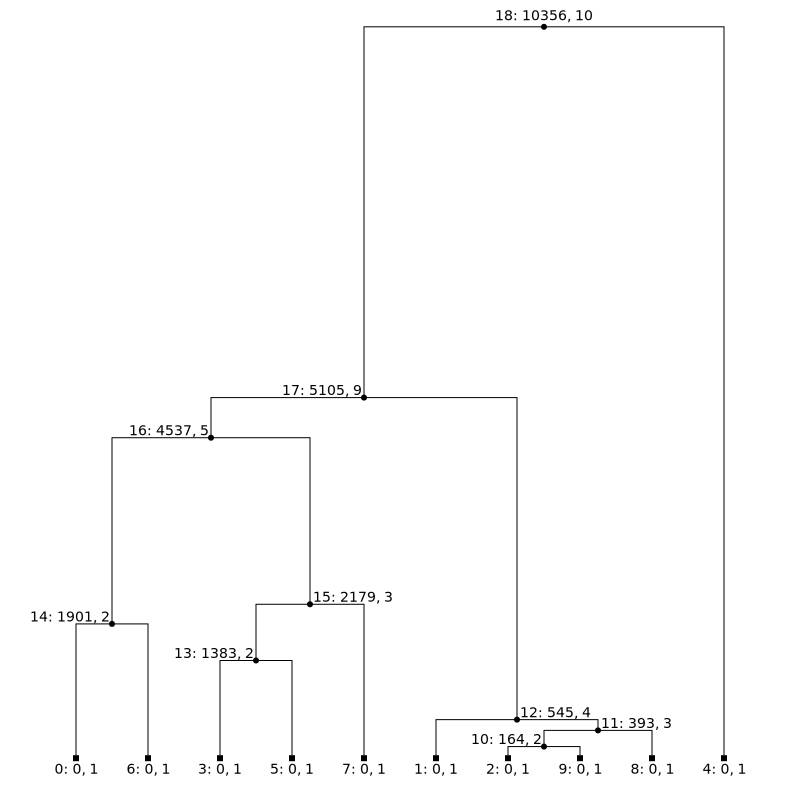

/home/runner/.local/lib/python3.8/site-packages/numpy/lib/stride_tricks.py:536: UserWarning: Warning: converting a masked element to nan.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


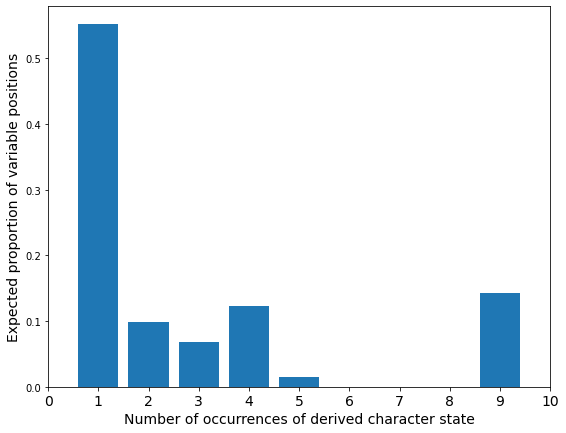

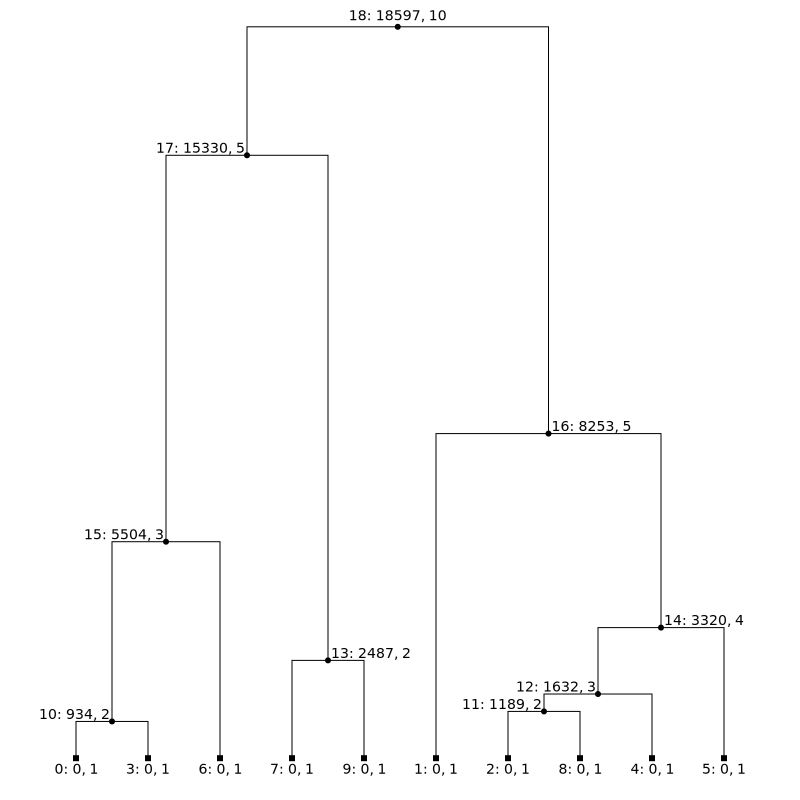

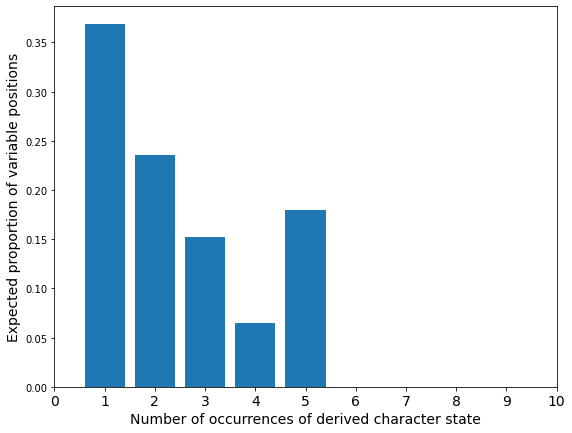

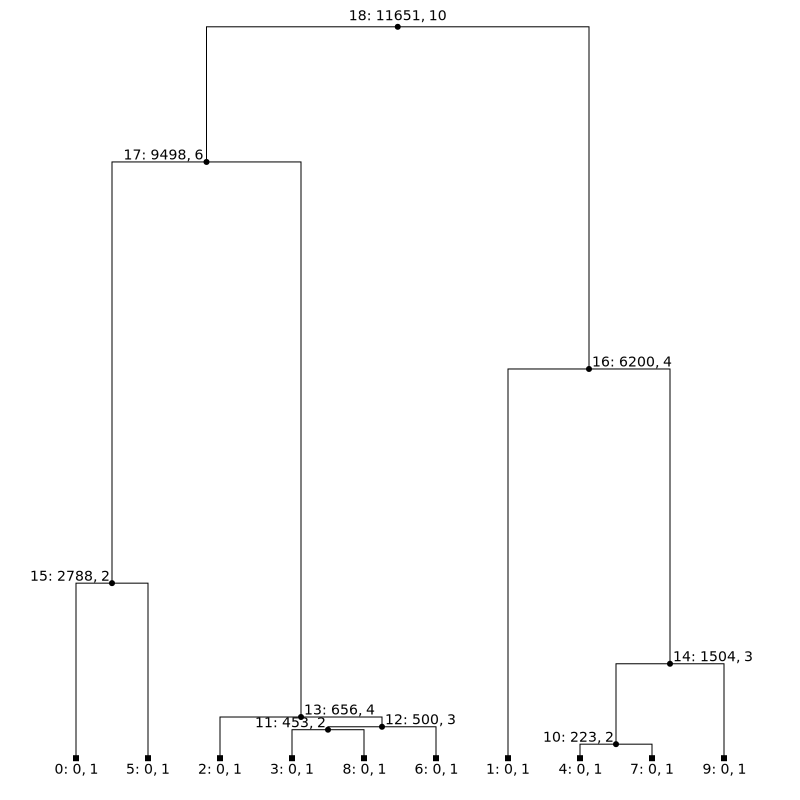

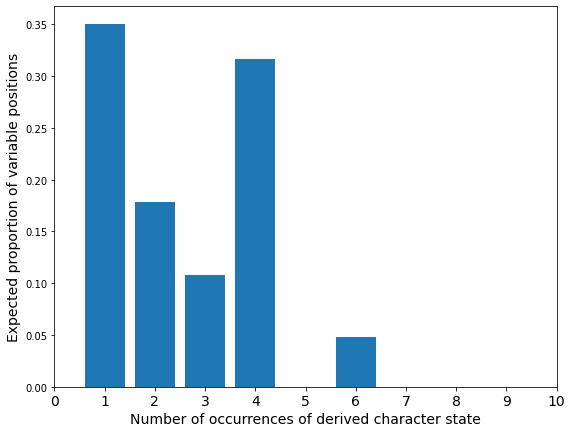

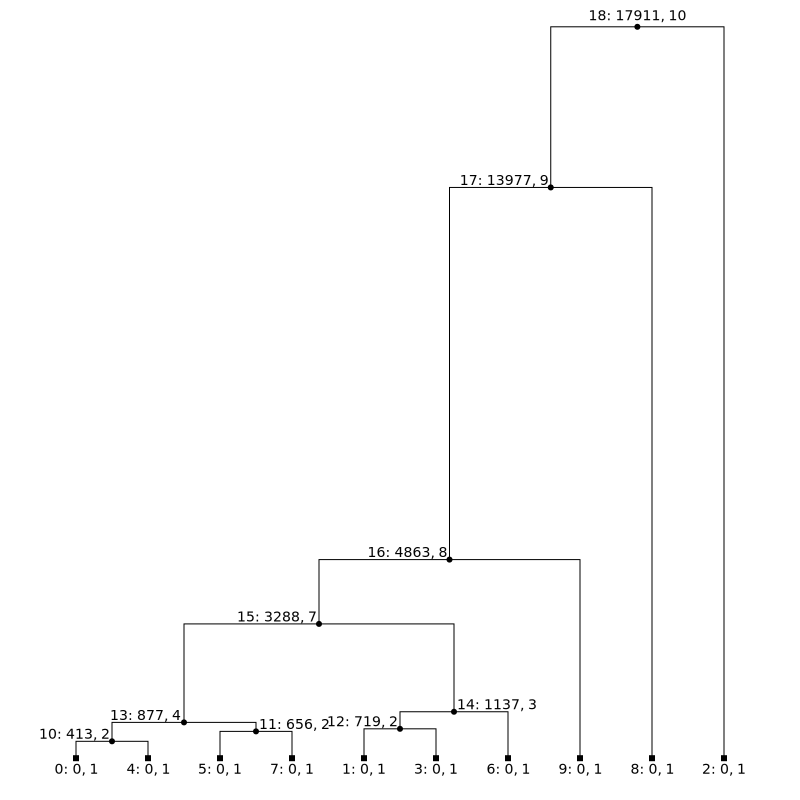

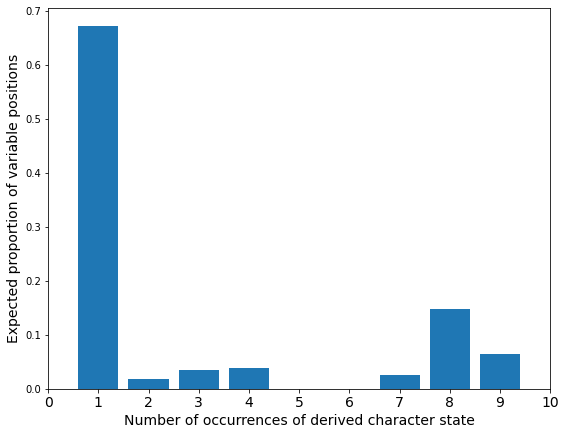

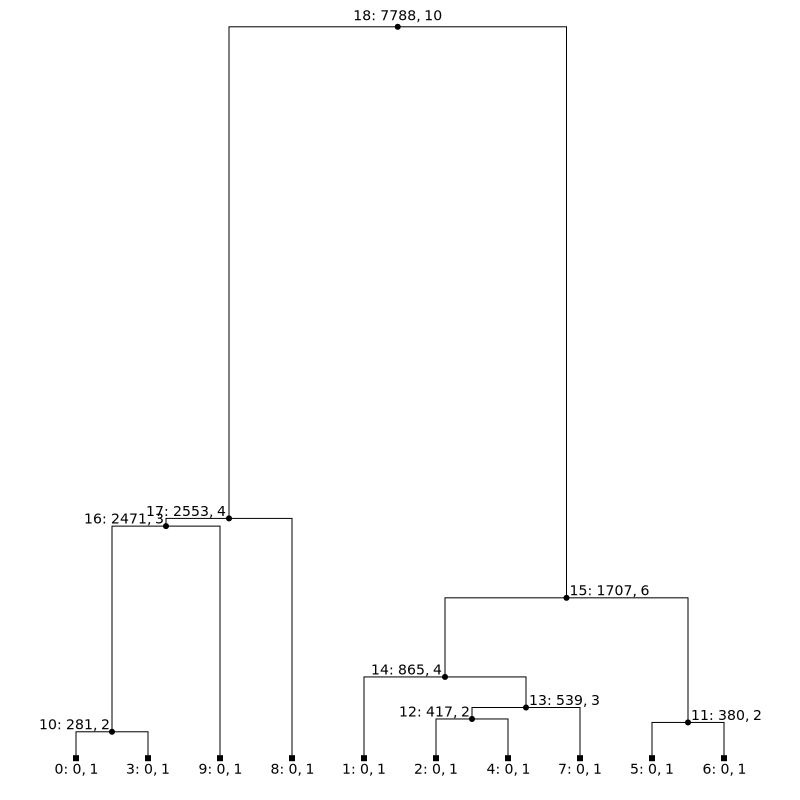

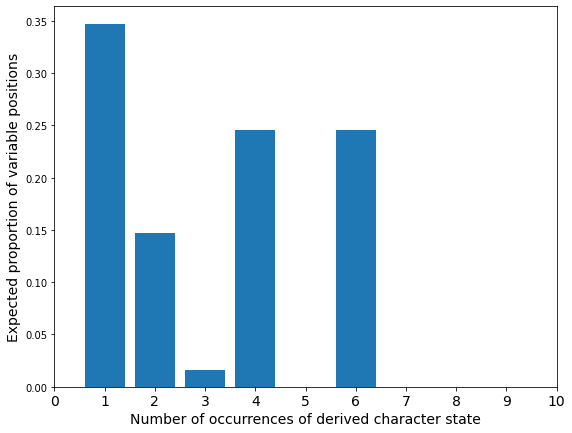

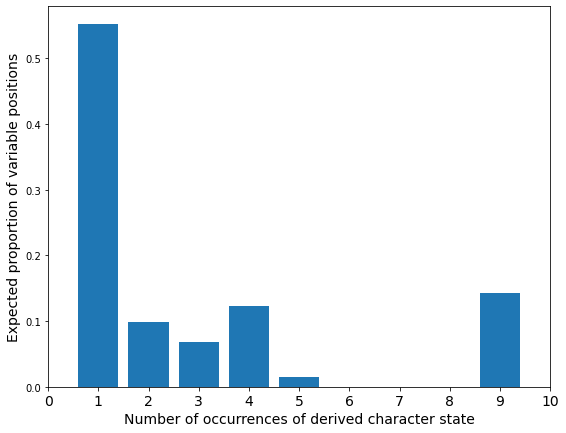

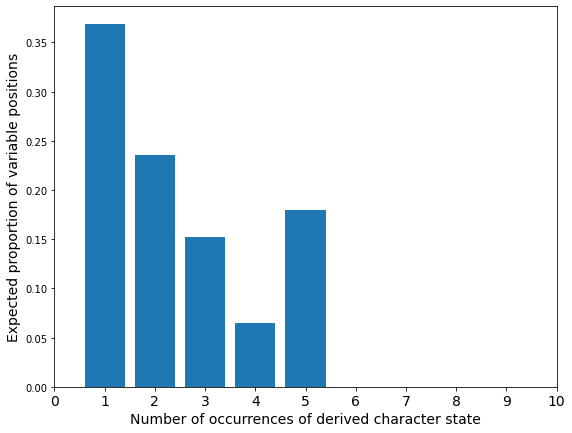

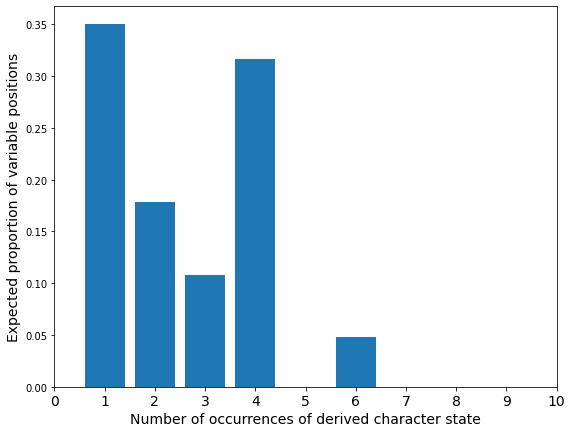

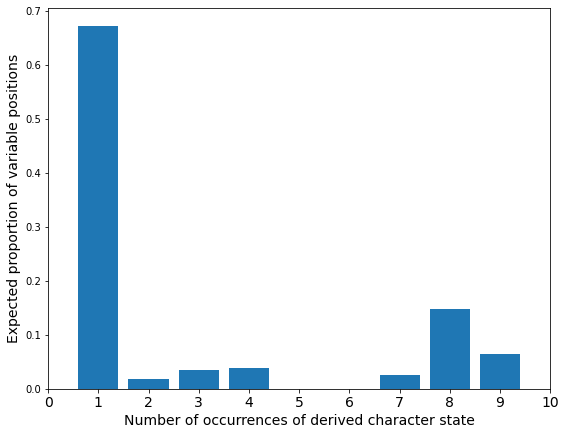

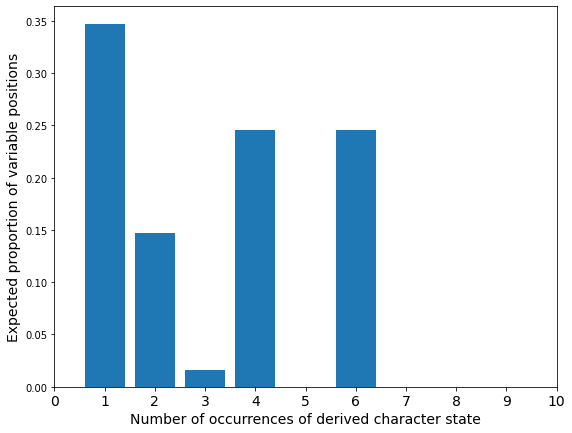

In [1]:
import msprime
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG
from myst_nb import glue


for i, ts in enumerate(
    msprime.sim_ancestry(
        10, ploidy=1, population_size=10000, random_seed=99112288, num_replicates=5
    )
):
    tree = ts.first()
    ndes = {i:tree.num_samples(i) for i in tree.nodes()}
    node_labels={i: f"{i}: {int(ts.tables.nodes.time[i])}, {ndes[i]}" for i in range(ts.num_nodes)}
    svg = ts.draw_svg(size=(800, 800), x_scale="treewise", x_axis=False, y_axis=False, node_labels=node_labels)
    glue(f"tree{i+1}", SVG(svg), display=False)
    fs = ts.allele_frequency_spectrum(polarised=True, mode="branch")
    fs = fs/fs.sum()
    mask = [False for _ in fs]
    mask[0] = True
    mask[-1] = True
    mfs = np.ma.masked_array(fs, mask)
    f = plt.figure(figsize=(9, 7))
    ax = plt.subplot(111)
    ax.bar(x=[i for i in range(len(mfs))],height=mfs)
    ax.set_xticks([i for i in range(len(mfs))])
    ax.set_xticklabels([i for i in range(len(mfs))], fontsize=14)
    ax.set_xlabel("Number of occurrences of derived character state", fontsize=14)
    ax.set_ylabel("Expected proportion of variable positions", fontsize=14)
    glue(f"tree{i+1}_fs", f, display=False)

````{tabbed} Tree 1
```{glue:figure} tree1
:figwidth: 800
:name: "tree1"
```
````

````{tabbed} Tree 2
```{glue:figure} tree2
:figwidth: 800
:name: "tree2"
```
````

````{tabbed} Tree 3
```{glue:figure} tree3
:figwidth: 800
:name: "tree3"
```
````

````{tabbed} Tree 4
```{glue:figure} tree4
:figwidth: 800
:name: "tree4"
```
````

````{tabbed} Tree 5
```{glue:figure} tree5
:figwidth: 800
:name: "tree5"
```
````